In [4]:
import re
import pandas as pd
import numpy as np
import pickle
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

#### Functions:

def compute_metrics(mat,language='English',method ='dimensional',output='data_frame'):
    """This function takes the output of emo_detect (either an array or a data_frame),
    and enriches it with additional variables (averages, percentage values etc). 
    You have to specify the language (English, German, or Chinese), the method (discrete or
    dimensional), and the output (data_frame or array), in the same way as in emo_detect.
    The function either returns a pandas data frame (for method='data_frame'), or a dictionary, in 
    which each entry is a numpy array (for method='array')."""
    language = language.lower()
    method = method.lower()
    if language == 'english':
        if method == 'dimensional':
            if output == 'data_frame':
                mat['NegCount'] = mat['DetectCount'] - mat['PosCount']
                mat['MeanNegVal'] = mat['NegVal'] / mat['NegCount']
                mat['MeanPosVal'] = mat['PosVal'] / mat['PosCount']
                mat['MeanArousal'] = mat['Arousal'] / mat['DetectCount']
                mat['MeanDominance'] = mat['Dominance'] / mat['DetectCount']
                mat['PosNegValDifference']  = mat['MeanPosVal'] - mat['MeanNegVal']
                mat['MeanValence'] =  (mat['NegVal'] + mat['PosVal'])/ mat['DetectCount']   
                mat['AbsMeanNegVal'] = abs(mat['MeanNegVal'])
                mat['DetectPercent'] = mat['DetectCount'] / mat['TokenCount']
                mat['DensityValence'] =(mat['NegVal'] + mat['PosVal'])/ mat['TokenCount'] 
                mat['DensityNegVal'] = mat['NegVal'] / mat['TokenCount']
                mat['DensityPosVal'] = mat['PosVal'] / mat['TokenCount']
                mat['DensityArousal'] = mat['Arousal'] / mat['TokenCount']
                mat['DensityDominance'] = mat['Dominance'] / mat['TokenCount']
                mat['MeanSquaredValence'] = mat['ValSq'] / mat['DetectCount']
                mat['ValenceDeviation'] = np.sqrt(mat['MeanSquaredValence'])
                return(mat)
            elif output == 'array':
                out_dict = {}
                out_dict['PosVal'] = mat[:,:,0]
                out_dict['NegVal'] = mat[:,:,1]
                out_dict['Arousal'] = mat[:,:,2]
                out_dict['Dominance'] = mat[:,:,3]
                out_dict['PosCount'] = mat[:,:,4]
                out_dict['DetectCount'] = mat[:,:,5]
                out_dict['TokenCount'] = mat[:,:,6]
                out_dict['ValSq'] = mat[:,:,7]

                out_dict['DetectPercent'] = np.divide(out_dict['DetectCount'],out_dict['TokenCount'])
                out_dict['NegCount'] = np.subtract(out_dict['DetectCount'],out_dict['PosCount'])
                # Mean Values:
                out_dict['MeanValence'] = np.divide(np.add(out_dict['PosVal'],out_dict['NegVal']),out_dict['DetectCount'])
                out_dict['MeanNegVal'] = np.divide(out_dict['NegVal'],out_dict['NegCount'])
                out_dict['MeanPosVal'] = np.divide(out_dict['PosVal'],out_dict['PosCount'])
                out_dict['MeanArousal'] = np.divide(out_dict['Arousal'],out_dict['DetectCount'])
                out_dict['MeanDominance'] = np.divide(out_dict['Dominance'],out_dict['DetectCount'])
                out_dict['PosNegValDifference'] = np.subtract(out_dict['MeanPosVal'] ,out_dict['MeanNegVal'])
                # Percentages:
                out_dict['DetectPosPercent'] = np.divide(out_dict['PosCount'],out_dict['DetectCount'])
                out_dict['OverallPosPercent'] = np.divide(out_dict['PosCount'],out_dict['TokenCount'])
                out_dict['DetectNegPercent'] = np.divide(out_dict['NegCount'],out_dict['DetectCount'])
                out_dict['OverallNegPercent'] = np.divide(out_dict['NegCount'],out_dict['TokenCount'])
                out_dict['MeanSquaredValence'] = np.divide(out_dict['ValSq'],out_dict['DetectCount'])
                out_dict['ValenceDeviation'] = np.sqrt(out_dict['MeanSquaredValence'])
                return(out_dict)
            else:
                print("Error: Output Format not found!")
        elif method == 'discrete':
            if output == 'data_frame':
                mat['function_Percent'] = mat.function / mat.TokenCount
                mat['pronoun_Percent'] = mat.pronoun / mat.TokenCount
                mat['ppron_Percent'] = mat.ppron / mat.TokenCount
                mat['i_Percent'] = mat.i / mat.TokenCount
                mat['we_Percent'] = mat.we / mat.TokenCount
                mat['you_Percent'] = mat.you / mat.TokenCount
                mat['shehe_Percent'] = mat.shehe / mat.TokenCount
                mat['they_Percent'] = mat.they / mat.TokenCount
                mat['ipron_Percent'] = mat.ipron / mat.TokenCount
                mat['article_Percent'] = mat.article / mat.TokenCount
                mat['prep_Percent'] = mat.prep / mat.TokenCount
                mat['auxverb_Percent'] = mat.auxverb / mat.TokenCount
                mat['adverb_Percent'] = mat.adverb / mat.TokenCount
                mat['conj_Percent'] = mat.conj / mat.TokenCount
                mat['negate_Percent'] = mat.negate / mat.TokenCount
                mat['verb_Percent'] = mat.verb / mat.TokenCount
                mat['adj_Percent'] = mat.adj / mat.TokenCount
                mat['compare_Percent'] = mat.compare / mat.TokenCount
                mat['interrog_Percent'] = mat.interrog / mat.TokenCount
                mat['number_Percent'] = mat.number / mat.TokenCount
                mat['quant_Percent'] = mat.quant / mat.TokenCount
                mat['affect_Percent'] = mat.affect / mat.TokenCount
                mat['posemo_Percent'] = mat.posemo / mat.TokenCount
                mat['negemo_Percent'] = mat.negemo / mat.TokenCount
                mat['anx_Percent'] = mat.anx / mat.TokenCount
                mat['anger_Percent'] = mat.anger / mat.TokenCount
                mat['sad_Percent'] = mat.sad / mat.TokenCount
                mat['social_Percent'] = mat.social / mat.TokenCount
                mat['family_Percent'] = mat.family / mat.TokenCount
                mat['friend_Percent'] = mat.friend / mat.TokenCount
                mat['female_Percent'] = mat.female / mat.TokenCount
                mat['male_Percent'] = mat.male / mat.TokenCount
                mat['cogproc_Percent'] = mat.cogproc / mat.TokenCount
                mat['insight_Percent'] = mat.insight / mat.TokenCount
                mat['cause_Percent'] = mat.cause / mat.TokenCount
                mat['discrep_Percent'] = mat.discrep / mat.TokenCount
                mat['tentat_Percent'] = mat.tentat / mat.TokenCount
                mat['certain_Percent'] = mat.certain / mat.TokenCount
                mat['differ_Percent'] = mat.differ / mat.TokenCount
                mat['percept_Percent'] = mat.percept / mat.TokenCount
                mat['see_Percent'] = mat.see / mat.TokenCount
                mat['hear_Percent'] = mat.hear / mat.TokenCount
                mat['feel_Percent'] = mat.feel / mat.TokenCount
                mat['bio_Percent'] = mat.bio / mat.TokenCount
                mat['body_Percent'] = mat.body / mat.TokenCount
                mat['health_Percent'] = mat.health / mat.TokenCount
                mat['sexual_Percent'] = mat.sexual / mat.TokenCount
                mat['ingest_Percent'] = mat.ingest / mat.TokenCount
                mat['drives_Percent'] = mat.drives / mat.TokenCount
                mat['affiliation_Percent'] = mat.affiliation / mat.TokenCount
                mat['achieve_Percent'] = mat.achieve / mat.TokenCount
                mat['power_Percent'] = mat.power / mat.TokenCount
                mat['reward_Percent'] = mat.reward / mat.TokenCount
                mat['risk_Percent'] = mat.risk / mat.TokenCount
                mat['focuspast_Percent'] = mat.focuspast / mat.TokenCount
                mat['focuspresent_Percent'] = mat.focuspresent / mat.TokenCount
                mat['focusfuture_Percent'] = mat.focusfuture / mat.TokenCount
                mat['relativ_Percent'] = mat.relativ / mat.TokenCount
                mat['motion_Percent'] = mat.motion / mat.TokenCount
                mat['space_Percent'] = mat.space / mat.TokenCount
                mat['time_Percent'] = mat.time / mat.TokenCount
                mat['work_Percent'] = mat.work / mat.TokenCount
                mat['leisure_Percent'] = mat.leisure / mat.TokenCount
                mat['home_Percent'] = mat.home / mat.TokenCount
                mat['money_Percent'] = mat.money / mat.TokenCount
                mat['relig_Percent'] = mat.relig / mat.TokenCount
                mat['death_Percent'] = mat.death / mat.TokenCount
                mat['informal_Percent'] = mat.informal / mat.TokenCount
                mat['swear_Percent'] = mat.swear / mat.TokenCount
                mat['netspeak_Percent'] = mat.netspeak / mat.TokenCount
                mat['assent_Percent'] = mat.assent / mat.TokenCount
                mat['nonflu_Percent'] = mat.nonflu / mat.TokenCount
                mat['filler_Percent'] = mat.filler / mat.TokenCount
                mat['Detect_Percent'] = mat.DetectCount / mat.TokenCount
                return(mat)
            elif output == 'array':
                out_dict = {}
                out_dict['Affect'] = mat[:,:,21]
                out_dict['Posemo'] = mat[:,:,22]
                out_dict['Negemo'] = mat[:,:,23]
                out_dict['Anx'] = mat[:,:,24]
                out_dict['Anger'] = mat[:,:,25]
                out_dict['Sad'] = mat[:,:,26]
                out_dict['Function'] = mat[:,:,0]
                out_dict['CogProc'] = mat[:,:,32]
                out_dict['DetectCount'] = mat[:,:,-2]
                out_dict['TokenCount'] = mat[:,:,-1]

                out_dict['DetectPosPercent'] = np.divide(out_dict['Posemo'], out_dict['DetectCount'])
                out_dict['OverallPosPercent'] = np.divide(out_dict['Posemo'], out_dict['TokenCount'])
                out_dict['DetectNegPercent'] = np.divide(out_dict['Negemo'], out_dict['DetectCount'])
                out_dict['OverallNegPercent'] = np.divide(out_dict['Negemo'], out_dict['TokenCount'])
                out_dict['EmoPosPercent'] = np.divide(out_dict['Posemo'],np.add(out_dict['Posemo'],out_dict['Negemo']))
                out_dict['DetectAnxPercent'] = np.divide(out_dict['Anx'], out_dict['DetectCount'])
                out_dict['OverallAnxPercent'] = np.divide(out_dict['Anx'], out_dict['TokenCount'])
                out_dict['DetectAngerPercent'] = np.divide(out_dict['Anger'], out_dict['DetectCount'])
                out_dict['OverallAngerPercent'] = np.divide(out_dict['Anger'], out_dict['TokenCount'])
                out_dict['DetectSadPercent'] = np.divide(out_dict['Sad'], out_dict['DetectCount'])
                out_dict['OverallSadPercent'] = np.divide(out_dict['Sad'], out_dict['TokenCount'])
                out_dict['DetectAffectPercent'] = np.divide(out_dict['Affect'], out_dict['DetectCount'])
                out_dict['OverallAffectPercent'] = np.divide(out_dict['Affect'], out_dict['TokenCount'])


                out_dict['DetectFunctionPercent'] = np.divide(out_dict['Function'], out_dict['DetectCount'])
                out_dict['OverallFunctionPercent'] = np.divide(out_dict['Function'], out_dict['TokenCount'])
                out_dict['DetectCogprocPercent'] = np.divide(out_dict['CogProc'], out_dict['DetectCount'])
                out_dict['OverallCogprocPercent'] = np.divide(out_dict['CogProc'], out_dict['TokenCount'])
                return(out_dict)
            else:
                print("Error: Output Format not found!")    
        else:
            print("Error: Method not found!")
    elif language == 'german':
        if method == 'dimensional':
            if output == 'data_frame':
                mat['NegCount'] = mat['DetectCount'] - mat['PosCount']
                mat['MeanNegVal'] = mat['NegVal'] / mat['NegCount']
                mat['MeanPosVal'] = mat['PosVal'] / mat['PosCount']
                mat['MeanArousal'] = mat['Arousal'] / mat['DetectCount']
                mat['MeanDominance'] = mat['Dominance'] / mat['DetectCount']
                mat['MeanPotency'] = mat['Potency'] / mat['DetectCount']
                mat['PosNegValDifference']  = mat['MeanPosVal'] - mat['MeanNegVal']
                mat['MeanValence'] =  (mat['NegVal'] + mat['PosVal'])/ mat['DetectCount']   
                mat['AbsMeanNegVal'] = abs(mat['MeanNegVal'])
                mat['DetectPercent'] = mat['DetectCount'] / mat['TokenCount']
                mat['DensityValence'] =(mat['NegVal'] + mat['PosVal'])/ mat['TokenCount'] 
                mat['DensityNegVal'] = mat['NegVal'] / mat['TokenCount']
                mat['DensityPosVal'] = mat['PosVal'] / mat['TokenCount']
                mat['DensityArousal'] = mat['Arousal'] / mat['TokenCount']
                mat['DensityDominance'] = mat['Dominance'] / mat['TokenCount']
                mat['MeanSquaredValence'] = mat['ValSq'] / mat['DetectCount']
                mat['ValenceDeviation'] = np.sqrt(mat['MeanSquaredValence'])
                return(mat)
            elif output == 'array':
                out_dict = {}
                out_dict['PosVal'] = mat[:,:,0]
                out_dict['NegVal'] = mat[:,:,1]
                out_dict['Arousal'] = mat[:,:,2]
                out_dict['Dominance'] = mat[:,:,3]
                out_dict['PosCount'] = mat[:,:,4]
                out_dict['DetectCount'] = mat[:,:,5]
                out_dict['Imagine'] = mat[:,:,6]
                out_dict['Potency'] = mat[:,:,7]
                out_dict['DomPot_Count'] = mat[:,:,8]
                out_dict['TokenCount'] = mat[:,:,9]
                out_dict['ValSq'] = mat[:,:,10]

                out_dict['DetectPercent'] = np.divide(out_dict['DetectCount'],out_dict['TokenCount'])
                out_dict['NegCount'] = np.subtract(out_dict['DetectCount'],out_dict['PosCount'])
                # Mean Values:
                out_dict['MeanValence'] = np.divide(np.add(out_dict['PosVal'],out_dict['NegVal']),out_dict['DetectCount'])
                out_dict['MeanNegVal'] = np.divide(out_dict['NegVal'],out_dict['NegCount'])
                out_dict['MeanPosVal'] = np.divide(out_dict['PosVal'],out_dict['PosCount'])
                out_dict['MeanArousal'] = np.divide(out_dict['Arousal'],out_dict['DetectCount'])
                out_dict['MeanDominance'] = np.divide(out_dict['Dominance'],out_dict['DomPot_Count'])
                out_dict['MeanPotency'] = np.divide(out_dict['Potency'],out_dict['DomPot_Count'])
                out_dict['PosNegValDifference'] = np.subtract(out_dict['MeanPosVal'] ,out_dict['MeanNegVal'])
                # Percentages:
                out_dict['DetectPosPercent'] = np.divide(out_dict['PosCount'],out_dict['DetectCount'])
                out_dict['OverallPosPercent'] = np.divide(out_dict['PosCount'],out_dict['TokenCount'])
                out_dict['DetectNegPercent'] = np.divide(out_dict['NegCount'],out_dict['DetectCount'])
                out_dict['OverallNegPercent'] = np.divide(out_dict['NegCount'],out_dict['TokenCount'])
                out_dict['MeanSquaredValence'] = np.divide(out_dict['ValSq'],out_dict['DetectCount'])
                out_dict['ValenceDeviation'] = np.sqrt(out_dict['MeanSquaredValence'])
                return(out_dict)
            else:
                print("Error: Output Format not found!")
        elif method == 'discrete':
            if output == 'data_frame':
                mat['Pronoun_Percent'] = mat.Pronoun / mat.TokenCount
                mat['I_Percent'] = mat.I / mat.TokenCount
                mat['We_Percent'] = mat.We / mat.TokenCount
                mat['Self_Percent'] = mat.Self / mat.TokenCount
                mat['You_Percent'] = mat.You / mat.TokenCount
                mat['Other_Percent'] = mat.Other / mat.TokenCount
                mat['Negate_Percent'] = mat.Negate / mat.TokenCount
                mat['Assent_Percent'] = mat.Assent / mat.TokenCount
                mat['Article_Percent'] = mat.Article / mat.TokenCount
                mat['Preps_Percent'] = mat.Preps / mat.TokenCount
                mat['Number_Percent'] = mat.Number / mat.TokenCount
                mat['Affect_Percent'] = mat.Affect / mat.TokenCount
                mat['Posemo_Percent'] = mat.Posemo / mat.TokenCount
                mat['Posfeel_Percent'] = mat.Posfeel / mat.TokenCount
                mat['Optim_Percent'] = mat.Optim / mat.TokenCount
                mat['Negemo_Percent'] = mat.Negemo / mat.TokenCount
                mat['Anx_Percent'] = mat.Anx / mat.TokenCount
                mat['Anger_Percent'] = mat.Anger / mat.TokenCount
                mat['Sad_Percent'] = mat.Sad / mat.TokenCount
                mat['Cogmech_Percent'] = mat.Cogmech / mat.TokenCount
                mat['Cause_Percent'] = mat.Cause / mat.TokenCount
                mat['Insight_Percent'] = mat.Insight / mat.TokenCount
                mat['Discrep_Percent'] = mat.Discrep / mat.TokenCount
                mat['Inhib_Percent'] = mat.Inhib / mat.TokenCount
                mat['Tentat_Percent'] = mat.Tentat / mat.TokenCount
                mat['Certain_Percent'] = mat.Certain / mat.TokenCount
                mat['Senses_Percent'] = mat.Senses / mat.TokenCount
                mat['See_Percent'] = mat.See / mat.TokenCount
                mat['Hear_Percent'] = mat.Hear / mat.TokenCount
                mat['Feel_Percent'] = mat.Feel / mat.TokenCount
                mat['Social_Percent'] = mat.Social / mat.TokenCount
                mat['Comm_Percent'] = mat.Comm / mat.TokenCount
                mat['Othref_Percent'] = mat.Othref / mat.TokenCount
                mat['Friends_Percent'] = mat.Friends / mat.TokenCount
                mat['Family_Percent'] = mat.Family / mat.TokenCount
                mat['Humans_Percent'] = mat.Humans / mat.TokenCount
                mat['Time_Percent'] = mat.Time / mat.TokenCount
                mat['Past_Percent'] = mat.Past / mat.TokenCount
                mat['Present_Percent'] = mat.Present / mat.TokenCount
                mat['Future_Percent'] = mat.Future / mat.TokenCount
                mat['Space_Percent'] = mat.Space / mat.TokenCount
                mat['Up_Percent'] = mat.Up / mat.TokenCount
                mat['Down_Percent'] = mat.Down / mat.TokenCount
                mat['Incl_Percent'] = mat.Incl / mat.TokenCount
                mat['Excl_Percent'] = mat.Excl / mat.TokenCount
                mat['Motion_Percent'] = mat.Motion / mat.TokenCount
                mat['Occup_Percent'] = mat.Occup / mat.TokenCount
                mat['School_Percent'] = mat.School / mat.TokenCount
                mat['Job_Percent'] = mat.Job / mat.TokenCount
                mat['Achieve_Percent'] = mat.Achieve / mat.TokenCount
                mat['Leisure_Percent'] = mat.Leisure / mat.TokenCount
                mat['Home_Percent'] = mat.Home / mat.TokenCount
                mat['Sports_Percent'] = mat.Sports / mat.TokenCount
                mat['TV_Percent'] = mat.TV / mat.TokenCount
                mat['Music_Percent'] = mat.Music / mat.TokenCount
                mat['Money_Percent'] = mat.Money / mat.TokenCount
                mat['Metaph_Percent'] = mat.Metaph / mat.TokenCount
                mat['Relig_Percent'] = mat.Relig / mat.TokenCount
                mat['Death_Percent'] = mat.Death / mat.TokenCount
                mat['Physcal_Percent'] = mat.Physcal / mat.TokenCount
                mat['Body_Percent'] = mat.Body / mat.TokenCount
                mat['Sexual_Percent'] = mat.Sexual / mat.TokenCount
                mat['Eating_Percent'] = mat.Eating / mat.TokenCount
                mat['Sleep_Percent'] = mat.Sleep / mat.TokenCount
                mat['Groom_Percent'] = mat.Groom / mat.TokenCount
                mat['Swear_Percent'] = mat.Swear / mat.TokenCount
                mat['Nonfl_Percent'] = mat.Nonfl / mat.TokenCount
                mat['Fillers_Percent'] = mat.Fillers / mat.TokenCount
                mat['Swiss_Percent'] = mat.Swiss / mat.TokenCount
                mat['Ideo_Percent'] = mat.Ideo / mat.TokenCount
                mat['Personalpronomina_Percent'] = mat.Personalpronomina / mat.TokenCount
                mat['Indefinitpronomina_Percent'] = mat.Indefinitpronomina / mat.TokenCount
                mat['AuxiliaryVerbs_Percent'] = mat.AuxiliaryVerbs / mat.TokenCount
                mat['Konjunktionen_Percent'] = mat.Konjunktionen / mat.TokenCount
                mat['Adverbien_Percent'] = mat.Adverbien / mat.TokenCount
                mat['Detect_Percent'] = mat.LIWC_Counter / mat.TokenCount
                mat['Bedrohung_Percent'] = mat.Bedrohung / mat.TokenCount
                return(mat)

            elif output == 'array':
                out_dict = {}
                out_dict['Affect'] = mat[:,:,11]
                out_dict['Posemo'] = mat[:,:,12]
                out_dict['Posfeel'] = mat[:,:,13]
                out_dict['Optim'] = mat[:,:,14]
                out_dict['Negemo'] = mat[:,:,15]
                out_dict['Anx'] = mat[:,:,16]
                out_dict['Anger'] = mat[:,:,17]
                out_dict['Sad'] = mat[:,:,18]
                out_dict['Function'] = mat[:,:,0]
                out_dict['CogProc'] = mat[:,:,32]
                out_dict['DetectCount'] = mat[:,:,-2]
                out_dict['TokenCount'] = mat[:,:,-1]

                out_dict['DetectPosPercent'] = np.divide(out_dict['Posemo'], out_dict['DetectCount'])
                out_dict['OverallPosPercent'] = np.divide(out_dict['Posemo'], out_dict['TokenCount'])
                out_dict['DetectPosfeelPercent'] = np.divide(out_dict['Posfeel'], out_dict['DetectCount'])
                out_dict['OverallPosfeelPercent'] = np.divide(out_dict['Posfeel'], out_dict['TokenCount'])
                out_dict['DetectOptimPercent'] = np.divide(out_dict['Optim'], out_dict['DetectCount'])
                out_dict['OverallOptimPercent'] = np.divide(out_dict['Optim'], out_dict['TokenCount'])
                out_dict['DetectNegPercent'] = np.divide(out_dict['Negemo'], out_dict['DetectCount'])
                out_dict['OverallNegPercent'] = np.divide(out_dict['Negemo'], out_dict['TokenCount'])
                out_dict['EmoPosPercent'] = np.divide(out_dict['Posemo'],np.add(out_dict['Posemo'],out_dict['Negemo']))
                out_dict['DetectAnxPercent'] = np.divide(out_dict['Anx'], out_dict['DetectCount'])
                out_dict['OverallAnxPercent'] = np.divide(out_dict['Anx'], out_dict['TokenCount'])
                out_dict['DetectAngerPercent'] = np.divide(out_dict['Anger'], out_dict['DetectCount'])
                out_dict['OverallAngerPercent'] = np.divide(out_dict['Anger'], out_dict['TokenCount'])
                out_dict['DetectSadPercent'] = np.divide(out_dict['Sad'], out_dict['DetectCount'])
                out_dict['OverallSadPercent'] = np.divide(out_dict['Sad'], out_dict['TokenCount'])

                out_dict['DetectAffectPercent'] = np.divide(out_dict['Affect'], out_dict['DetectCount'])
                out_dict['OverallAffectPercent'] = np.divide(out_dict['Affect'], out_dict['TokenCount'])
                out_dict['DetectFunctionPercent'] = np.divide(out_dict['Function'], out_dict['DetectCount'])
                out_dict['OverallFunctionPercent'] = np.divide(out_dict['Function'], out_dict['TokenCount'])
                out_dict['DetectCogprocPercent'] = np.divide(out_dict['CogProc'], out_dict['DetectCount'])
                out_dict['OverallCogprocPercent'] = np.divide(out_dict['CogProc'], out_dict['TokenCount'])
                return(out_dict)
            else:
                print("Error: Output Format not found!")    
        else:
            print("Error: Method not found!")    
    elif language == 'chinese':
        if method == 'dimensional':
            if output == 'data_frame':
                print("Error: This combination doesn't exist yet!")
            elif output == 'array':
                print("Error: This combination doesn't exist yet!")
            else:
                print("Error: Output Format not found!")
        elif method == 'discrete':
            if output == 'data_frame':
                print("Error: This combination doesn't exist yet!")
            elif output == 'array':
                out_dict = {}
                out_dict['Affect'] = mat[:,:,30]
                out_dict['Posemo'] = mat[:,:,31]
                out_dict['Negemo'] = mat[:,:,32]
                out_dict['Anx'] = mat[:,:,33]
                out_dict['Anger'] = mat[:,:,34]
                out_dict['Sad'] = mat[:,:,35]
                out_dict['Function'] = mat[:,:,0]
                out_dict['CogProc'] = mat[:,:,41]
                out_dict['DetectCount'] = mat[:,:,-2]
                out_dict['TokenCount'] = mat[:,:,-1]

                out_dict['DetectPosPercent'] = np.divide(out_dict['Posemo'], out_dict['DetectCount'])
                out_dict['OverallPosPercent'] = np.divide(out_dict['Posemo'], out_dict['TokenCount'])
                out_dict['DetectNegPercent'] = np.divide(out_dict['Negemo'], out_dict['DetectCount'])
                out_dict['OverallNegPercent'] = np.divide(out_dict['Negemo'], out_dict['TokenCount'])
                out_dict['EmoPosPercent'] = np.divide(out_dict['Posemo'],np.add(out_dict['Posemo'],out_dict['Negemo']))
                out_dict['DetectAnxPercent'] = np.divide(out_dict['Anx'], out_dict['DetectCount'])
                out_dict['OverallAnxPercent'] = np.divide(out_dict['Anx'], out_dict['TokenCount'])
                out_dict['DetectAngerPercent'] = np.divide(out_dict['Anger'], out_dict['DetectCount'])
                out_dict['OverallAngerPercent'] = np.divide(out_dict['Anger'], out_dict['TokenCount'])
                out_dict['DetectSadPercent'] = np.divide(out_dict['Sad'], out_dict['DetectCount'])
                out_dict['OverallSadPercent'] = np.divide(out_dict['Sad'], out_dict['TokenCount'])
                out_dict['DetectAffectPercent'] = np.divide(out_dict['Affect'], out_dict['DetectCount'])
                out_dict['OverallAffectPercent'] = np.divide(out_dict['Affect'], out_dict['TokenCount'])
                out_dict['DetectPercent'] = np.divide(out_dict['DetectCount'], out_dict['TokenCount'])

                out_dict['DetectFunctionPercent'] = np.divide(out_dict['Function'], out_dict['DetectCount'])
                out_dict['OverallFunctionPercent'] = np.divide(out_dict['Function'], out_dict['TokenCount'])
                out_dict['DetectCogprocPercent'] = np.divide(out_dict['CogProc'], out_dict['DetectCount'])
                out_dict['OverallCogprocPercent'] = np.divide(out_dict['CogProc'], out_dict['TokenCount'])
                return(out_dict)
            else:
                print("Error: Output Format not found!")    
        else:
            print("Error: Method not found!")    
    else:
        print("Error: Language not found!")


def star_check(word,star_dict,pos_list,vec_length):
    """Helper function of emo_detect: Check for match with wordstem dictionary (star_liwc_dict).
    If no match, return vector representing unmatched token."""
    searchlist = [x for x in pos_list if x <= len(word)]
    for i in searchlist:
        try:
            return(star_dict[i][word[:i]])
        except KeyError:
            continue
    null_vec = np.zeros(vec_length)
    null_vec[-1] = 1
    return(null_vec)

def url_at_remove(text):
    """Remove terms starting with '@' and'#', as well as urls"""
    text = re.sub(r'#\w+|@\w+',' ',text)
    # Remove url:
    return(re.sub(r'\bhttps?:\/\/.*[\r\n]*', ' ', text, flags=re.MULTILINE))

punct_characters =  re.compile(r"""[\[\]【】\(（\）)"“”●>《》：！!。°，,’？?#$%&*+/~～<=>@^_、'`{|}~；;:︰·.—–…\-]""")
ch_sep_characters = r"""[●：！!。°？?；;:︰·.…]"""

def punct_remove(text):
    """Remove punctuation characters from text."""
    return(re.sub(punct_characters,' ',text))

def tokenize(text):
    # remove urls and words starting with '#' or "@":
    text = url_at_remove(text)
    # replace puntuation characters with ' ':
    text = punct_remove(text)
    # de-capitalize text:
    text = text.lower()
    # split text on space characters:
    token_list = re.split(r'\s+',text)
    # remove empty characters:
    token_list = [token.strip() for token in token_list if token]
    return(token_list)

def text_detect(text,max_len,vec_len,pos_list,dicts=None, stemmer=None,method ='discrete',output ='array'):
    if method == 'dimensional':
        dim_dict = dicts
    elif method == 'discrete':
        naster_disc_dict,aster_disc_dict = dicts
    if output == 'array':
        # Create empty vector:
        emo_mat = []
    elif output == 'data_frame':
        # Create empty vector:
        emo_mat = np.zeros(vec_len)
    # clean and tokenize text:
    text = tokenize(text)
    # determine text length:
    text_len = len(text)
    # If the text is longer than our maximum length, go to next text:
    if (text_len > max_len) or (text_len == 0):
        return(0)
    # Subtract one from text length, cause we use it as an index for the matrix:
    text_len = text_len - 1
    # Stem words in text:
    if stemmer:
        text = [stemmer.stem(x) for x in text]
    # Word position counter:
    w_pos = 0
    # Iterate over words in text:
    for token in text:
        # Dimensional method (continuous arousal/valence values):
        if method == 'dimensional':
            # look up word in dim_dict, else return zero-vector:
            emo_vec = dim_dict.get(token,((0,)*(vec_len-2)) + (1,0))
        # Discrete method (counts of pos/neg words):
        elif method == 'discrete':
            # Look up word in naster_dict, else return 0:
            emo_vec = naster_disc_dict.get(token,0)
            # If zero was returned in last line, apply star_chek (look for matching word stems):
            if isinstance(emo_vec, int):
                emo_vec = star_check(token,aster_disc_dict,pos_list,vec_len)
        # If output is an array:
        if output == 'array':
            # Add emo_vec to appropriate position in emo_mat:
            emo_mat.append(np.array(emo_vec).reshape((1,vec_len)))
        elif output == 'data_frame':
            # Add emo_vec to text_emo_vec:
            emo_mat[:] += emo_vec
        # Increase word position counter by 1:
        w_pos += 1
    #Return emo_mat:
    if output == 'array':
        return(text_len,np.concatenate(emo_mat,axis=0))
    else:
        return(emo_mat)

def sentence_tokenize(text,language='english'):
    if language == 'chinese':
        return(re.split(ch_sep_characters,text))
    else:
        return(sent_tokenize('Blah blah. Blah. Blahba!',language=language))


def emo_detect(text_list,language='English',method ='dimensional',output='data_frame',resolution = 'words_in_text', folder='',max_len=500000):
    """This is the main emotion detection function. It takes a list (or any iterable) of 
    texts as input. You have to specify:
    1) the 'language' of the text list (so far we have "English", "German", and "Chinese"), 
    2) what 'method' you want, meaning whether you want 'dimensional' or 'discrete' emotion 
    metrics ('discrete' is LIWC, 'dimensional' is the Warriner List in English, and a 
    combination of BAWL and ANGST in German; Chinese only has LIWC), and
    3) what output format you want to have: For almost all purposes this will be a 'data_frame',
    where the rows are the texts, and the columns are different metrics of discrete or 
    dimensional affect; Only for special purposes you will want to have an 'array', where rows
    are text length (in words), columns are word position in text, and layers are the 
    different affect metrics.
    
    Additionally, there is a 'remove_hashtag' parameter, which, if set to 'True', removes words
    starting with '#' or '@', and also removers urls.
    
    The script first loads the appropriate dictionary(s) for each language/metod combination,
    matching tokens to vectors that contain the emotion categories (discrete) or ratings 
    (dimensional).
    It then tokenizes each text, removes punctuation, and tries to match the tokens to the
    dictionary. In this way, it sums up affect category counts/ ratings for each text.
    The script returns either a pandas data_frame object (for output='data_frame'), or an 
    array (for output='array'). The output of emo_detect is good for storing, but only contains
    raw counts/ sums, and not interpretable values, such as percentages or averages. For this 
    purpose, the output of emo_detect needs to be passed to the function 'compute_metrics'."""
    
    # Dictionary containing file names of affect disctionaries:
    file_dict = {'english':{'dimensional':('english_anew_dict',),'discrete':('english_nstar_liwc_dict','english_star_liwc_dict')},\
                'german':{'dimensional':('german_anew_dict',),'discrete':('german_nstar_liwc_dict','german_star_liwc_dict')},\
                'chinese':{'discrete':('chinese_nstar_liwc_dict','chinese_star_liwc_dict')}}
    # Dictionary containing column names of data frames:
    colname_dict = {'english':{'dimensional':['PosVal', 'NegVal','Arousal','Dominance', 'PosCount','DetectCount','TokenCount','ValSq'],'discrete':['function', 'pronoun', 'ppron', 'i', 'we', 'you', 'shehe', 'they', 'ipron', 'article', 'prep', 'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'compare', 'interrog', 'number', 'quant', 'affect', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'social', 'family', 'friend', 'female', 'male', 'cogproc', 'insight', 'cause', 'discrep', 'tentat', 'certain', 'differ', 'percept', 'see', 'hear', 'feel', 'bio', 'body', 'health', 'sexual', 'ingest', 'drives', 'affiliation', 'achieve', 'power', 'reward', 'risk', 'focuspast', 'focuspresent', 'focusfuture', 'relativ', 'motion', 'space', 'time', 'work', 'leisure', 'home', 'money', 'relig', 'death', 'informal', 'swear', 'netspeak', 'assent', 'nonflu', 'filler','DetectCount','TokenCount']},\
                'german':{'dimensional':['PosVal', 'NegVal','Arousal','Dominance', 'PosCount','DetectCount','Imagine','Potency', 'DomPot_Count','TokenCount','ValSq'],'discrete':['Pronoun', 'I', 'We', 'Self', 'You', 'Other', 'Negate', 'Assent', 'Article', 'Preps', 'Number', 'Affect', 'Posemo', 'Posfeel', 'Optim', 'Negemo', 'Anx', 'Anger', 'Sad', 'Cogmech', 'Cause', 'Insight', 'Discrep', 'Inhib', 'Tentat', 'Certain', 'Senses', 'See', 'Hear', 'Feel', 'Social', 'Comm', 'Othref', 'Friends', 'Family', 'Humans', 'Time', 'Past', 'Present', 'Future', 'Space', 'Up', 'Down', 'Incl', 'Excl', 'Motion', 'Occup', 'School', 'Job', 'Achieve', 'Leisure', 'Home', 'Sports', 'TV', 'Music', 'Money', 'Metaph', 'Relig', 'Death', 'Physcal', 'Body', 'Sexual', 'Eating', 'Sleep', 'Groom', 'Swear', 'Nonfl', 'Fillers', 'Swiss', 'Ideo', 'Personalpronomina', 'Indefinitpronomina', 'AuxiliaryVerbs', 'Konjunktionen', 'Adverbien','Bedrohung', 'DetectCount','TokenCount']},\
                'chinese':{'discrete':['function', 'pronoun', 'ppron', 'i', 'we', 'you', 'shehe', 'they', 'youpl', 'ipron', 'prep', 'auxverb', 'adverb', 'conj', 'negate', 'quanunit', 'prepend', 'specart', 'tensem', 'focuspast', 'focuspresent', 'focusfuture', 'progm', 'particle', 'modal_pa', 'general_pa', 'compare', 'interrog', 'number', 'quant', 'affect', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'social', 'family', 'friend', 'female', 'male', 'cogproc', 'insight', 'cause', 'discrep', 'tentat', 'certain', 'differ', 'percept', 'see', 'hear', 'feel', 'bio', 'body', 'health', 'sexual', 'ingest', 'drives', 'affiliation', 'achieve', 'power', 'reward', 'risk', 'relativ', 'motion', 'space', 'time', 'work', 'leisure', 'home', 'money', 'relig', 'death', 'informal', 'swear', 'netspeak', 'assent', 'nonflu', 'filler', 'DetectCount','TokenCount']}}
    # Normalize language and method parameters:
    language = language.lower()
    method = method.lower()
    #Initiate empty stemmer:
    stemmer = []
    # Counter:
    c = 0
    # Get the files to load from the file_dict:
    files  = file_dict[language][method]
    # Get column names from col_dict:
    colnames = colname_dict[language][method]
    # Load files:
    # One dictionary (dimensional):
    if len(files) == 1:
        with open(folder + files[0],'rb') as f:
            dicts = pickle.load(f)
        # Length of affect vectors in dictionary:
        vec_len = len(list(dicts.values())[0])
        pos_list = 0
    # Two dictionaries (discrete):
    if len(files) == 2:
        with open(folder + files[0],'rb') as f:
            naster_disc_dict = pickle.load(f)
        with open(folder + files[1],'rb') as f:
            aster_disc_dict = pickle.load(f)
        dicts = (naster_disc_dict,aster_disc_dict)
        # Length of affect vectors in dictionary:
        vec_len = len(list(naster_disc_dict.values())[0])
    # Generate stemmer if german dimensional affect detection:
    if method == 'dimensional':
        if language == 'german':
            stemmer = SnowballStemmer('german')
    elif method == 'discrete':
        # List of stem lengths in the word stem dictionary:
        pos_list = list(reversed(list(aster_disc_dict.keys())))
    # Initiate vec_list if output is data_frame, and emo_mat if output is array:
    if output == 'data_frame': 
        vec_list = []
    elif output == 'array':
        emo_mat = np.zeros([max_len,max_len,vec_len])
    # for resolution 'sentences_in_text' create an emo_mat with one additional layer for sentence counter
    if resolution == 'sentences_in_text':
        emo_mat = np.zeros([max_len,max_len,vec_len+1])

    # Iterate over texts in text_list:
    for c,text in enumerate(text_list):
        # Print counter every 10,000 texts:
        if c % 10000 == 0:
            print(c)
        # Ignore if it's not a text:
        if not isinstance(text,str):
            continue
        # Resolution words in text:
        if resolution == 'words_in_text':
            # create vector or array (depending on 'ouptut'):
            emo_thingy = text_detect(text=text,max_len=max_len,vec_len=vec_len,pos_list=pos_list,dicts=dicts,stemmer=stemmer,method = method,output = output)
            # Skip text if output of 'text_detect' is 0.
            if isinstance(emo_thingy, int):
                continue
            # Append emo_thingy to vec_list or add to emo_mat (depending on 'ouptut'):
            elif output == 'data_frame': 
                vec_list.append(emo_thingy)
            elif output == 'array':
                emo_mat[emo_thingy[0],:emo_thingy[0]+1,:] += emo_thingy[1] 
        elif resolution == 'words_in_sentence':
            sent_list = sentence_tokenize(text,language=language)
            for sent in sent_list:
                # create vector or array (depending on 'ouptut'):
                emo_thingy = text_detect(text=sent,max_len=max_len,vec_len=vec_len,pos_list=pos_list,dicts=dicts,stemmer=stemmer,method = method,output = output)
                # Skip text if output of 'text_detect' is 0.
                if isinstance(emo_thingy, int):
                    continue
                # Append emo_thingy to vec_list or add to emo_mat (depending on 'ouptut'):
                elif output == 'data_frame': 
                    vec_list.append(emo_thingy)
                elif output == 'array':
                    emo_mat[emo_thingy[0],:emo_thingy[0]+1,:] += emo_thingy[1] 
        elif resolution == 'sentences_in_text':
            sent_list = sentence_tokenize(text,language=language)
            n_sent = len(sent_list)
            if (n_sent > max_len) or (n_sent == 0):
                continue
            n_sent = n_sent - 1
            for sc,sent in enumerate(sent_list):
                emo_thingy = text_detect(text=sent,max_len=10000,vec_len=vec_len,pos_list=pos_list,dicts=dicts,stemmer=stemmer,method = method,output = 'data_frame')
                if isinstance(emo_thingy, int):
                    continue
                emo_thingy = np.append(emo_thingy,np.array([1]))
                emo_mat[n_sent,sc,:] += emo_thingy
    # return data frame or array, depending on 'output':
    if output == 'data_frame':
        return(pd.DataFrame(vec_list,columns=colnames))
    elif output == 'array':
        return(emo_mat)

In [5]:
###READING BIPOLAR DATA
bipolar_data = pd.read_pickle("/Users/tanjakemper/Documents/Bipolar Project/datasets/bipolar_data/bipolar_data_without_retweets.pkl", compression='infer')

In [6]:
bipolar_data.head()

,id,text,userlang,date,is_control_group
0,1039634572034678784,"Sorry, didn't mean to rant.",en,2018-11-17 02:29:33,0
1,1039634572034678784,"Like, I had heart surgery but obviously my pri...",en,2018-11-17 02:28:34,0
2,1039634572034678784,Tbh part of the reason for dropping out is tha...,en,2018-11-17 02:27:02,0
3,1039634572034678784,I've been talking with my case worker about go...,en,2018-11-17 02:25:24,0
4,1039634572034678784,Basically mental and physical stuff have made ...,en,2018-11-17 02:23:17,0


In [8]:
text_list_bipolar = bipolar_data['text'].tolist()
text_list_bipolar

["Sorry, didn't mean to rant.",
 'Like, I had heart surgery but obviously my priority should have been my Japanese homework. Don\'t know why I didn\'t tell the doctors that before they admitted me. "I know this lump of endocarditis could kill me in less than a year, but I have midterms so I\'ll risk it."',
 "Tbh part of the reason for dropping out is that I know if my medical stuff lands me in the hospital again I won't pass anyways. I missed a month and a half, and when I tried to get an incomplete for my classes the teachers said no and treated it like I should have been in class.",
 "I've been talking with my case worker about going to an IRTS facility to try and get my depressive episodes into a manageable place, and I've decided to drop out after this semester because I'm pretty sure worrying about grades isn't helping.",
 'Basically mental and physical stuff have made me unable to make much of anything at all, and since this is my coping mechanism not being able to do it makes me

In [9]:
b = emo_detect(text_list_bipolar)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000


In [11]:
df_bipolar = compute_metrics(b)
df_bipolar

,PosVal,NegVal,Arousal,Dominance,PosCount,DetectCount,TokenCount,ValSq,NegCount,MeanNegVal,...,MeanValence,AbsMeanNegVal,DetectPercent,DensityValence,DensityNegVal,DensityPosVal,DensityArousal,DensityDominance,MeanSquaredValence,ValenceDeviation
0,0.0000,-1.0825,1.665714,1.610000,0.0,3.0,6.0,0.569119,3.0,-0.360833,...,-0.360833,0.360833,0.500000,-0.180417,-0.180417,0.000000,0.277619,0.268333,0.189706,0.435553
1,3.0275,-2.1550,6.900000,8.280000,10.0,14.0,53.0,2.495569,4.0,-0.538750,...,0.062321,0.538750,0.264151,0.016462,-0.040660,0.057123,0.130189,0.156226,0.178255,0.422202
2,2.7000,-0.7900,5.390000,7.680000,10.0,13.0,59.0,1.225913,3.0,-0.263333,...,0.146923,0.263333,0.220339,0.032373,-0.013390,0.045763,0.091356,0.130169,0.094301,0.307085
3,2.1800,-1.2350,5.667143,8.630000,9.0,13.0,46.0,1.431763,4.0,-0.308750,...,0.072692,0.308750,0.282609,0.020543,-0.026848,0.047391,0.123199,0.187609,0.110136,0.331867
4,3.4450,-0.6400,6.164286,10.785714,13.0,16.0,57.0,1.412238,3.0,-0.213333,...,0.175313,0.213333,0.280702,0.049211,-0.011228,0.060439,0.108145,0.189223,0.088265,0.297094
5,1.8825,-1.9750,5.851429,6.717143,6.0,12.0,46.0,1.505731,6.0,-0.329167,...,-0.007708,0.329167,0.260870,-0.002011,-0.042935,0.040924,0.127205,0.146025,0.125478,0.354228
6,3.5550,-1.1300,6.168571,7.962857,9.0,13.0,46.0,2.319687,4.0,-0.282500,...,0.186538,0.282500,0.282609,0.052717,-0.024565,0.077283,0.134099,0.173106,0.178437,0.422419
7,1.1400,0.0000,1.944286,2.577143,4.0,4.0,8.0,0.380737,0.0,NaN,...,0.285000,NaN,0.500000,0.142500,0.000000,0.142500,0.243036,0.322143,0.095184,0.308520
8,0.9600,-0.7500,2.211429,3.671429,4.0,6.0,9.0,0.575650,2.0,-0.375000,...,0.035000,0.375000,0.666667,0.023333,-0.083333,0.106667,0.245714,0.407937,0.095942,0.309745
9,0.5000,-0.0450,1.428571,2.555714,3.0,4.0,13.0,0.104112,1.0,-0.045000,...,0.113750,0.045000,0.307692,0.035000,-0.003462,0.038462,0.109890,0.196593,0.026028,0.161332


In [15]:
###READING CONTROL DATA
control_data = pd.read_pickle("/Users/tanjakemper/Documents/Bipolar Project/datasets/control_data/1/control_data_without_retweets.pkl", compression='infer')

In [16]:
text_list_control = control_data['text'].tolist()
text_list_control

['new balance derby in final #YNWA',
 'yook liverpool :(',
 'Watch Over You by Alter Bridge — https://t.co/StqWPHqKpU',
 'waah firmino false 9',
 'this is shit for origi tonight #rodgetsout',
 "The Man Who Can't Be Moved by @thescript — https://t.co/spksFhI3JO",
 'She said shut up and dance with me~ ♫ Shut Up and Dance by WALK THE MOON — https://t.co/TNBnns35Wy',
 'this is starting XI big cock',
 'Watching The Avengers: Age of Ultron — https://t.co/LOA12vNegn',
 'Watching Captain America 3 — https://t.co/CdB8VBAPbo',
 'liverpool ! #YNWA',
 "Reading Al-Qur'an by Unknown — https://t.co/fCKVgfH7Cr",
 'The River by Good Charlotte — https://t.co/MWkWDa6wwH',
 'The Anthem by Good Charlotte — https://t.co/wFt4rdli3W',
 'At Hotel Orchid — https://t.co/cwmbzt6jbu',
 'your eyes~ 😗 ♫ When I Look Into Your Eyes by FireHouse — https://t.co/zPAluLAwAe',
 'At Grand Rocky Hotel — https://t.co/TVxmfdYc4H',
 'At Rocky Hotel — https://t.co/N8lw46OBwl',
 "Reading Al-Qur'an by Unknown — https://t.co/tFhZBR

In [17]:
c = emo_detect(text_list_control)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
13

In [18]:
df_control = compute_metrics(c)
df_control

,PosVal,NegVal,Arousal,Dominance,PosCount,DetectCount,TokenCount,ValSq,NegCount,MeanNegVal,...,MeanValence,AbsMeanNegVal,DetectPercent,DensityValence,DensityNegVal,DensityPosVal,DensityArousal,DensityDominance,MeanSquaredValence,ValenceDeviation
0,1.1300,-0.1100,1.524286,1.661429,2.0,3.0,5.0,0.672600,1.0,-0.11000,...,0.340000,0.11000,0.600000,0.204000,-0.022000,0.226000,0.304857,0.332286,0.224200,0.473498
1,0.0000,0.0000,0.000000,0.000000,0.0,0.0,2.0,0.000000,0.0,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
2,0.2225,-0.1075,1.145714,1.985714,2.0,3.0,6.0,0.036313,1.0,-0.10750,...,0.038333,0.10750,0.500000,0.019167,-0.017917,0.037083,0.190952,0.330952,0.012104,0.110019
3,0.0000,0.0000,0.000000,0.000000,0.0,0.0,4.0,0.000000,0.0,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
4,0.0000,-0.2725,0.667143,0.512857,0.0,1.0,6.0,0.074256,1.0,-0.27250,...,-0.272500,0.27250,0.166667,-0.045417,-0.045417,0.000000,0.111190,0.085476,0.074256,0.272500
5,0.7525,0.0000,1.132857,2.054286,3.0,3.0,8.0,0.222306,0.0,NaN,...,0.250833,NaN,0.375000,0.094062,0.000000,0.094062,0.141607,0.256786,0.074102,0.272217
6,2.0775,-0.2500,2.818571,4.245714,4.0,6.0,17.0,1.121169,2.0,-0.12500,...,0.304583,0.12500,0.352941,0.107500,-0.014706,0.122206,0.165798,0.249748,0.186861,0.432275
7,0.1725,0.0000,1.152857,1.301429,2.0,2.0,6.0,0.025756,0.0,NaN,...,0.086250,NaN,0.333333,0.028750,0.000000,0.028750,0.192143,0.216905,0.012878,0.113482
8,0.1950,0.0000,0.387143,0.524286,1.0,1.0,6.0,0.038025,0.0,NaN,...,0.195000,NaN,0.166667,0.032500,0.000000,0.032500,0.064524,0.087381,0.038025,0.195000
9,0.1775,0.0000,0.408571,0.571429,1.0,1.0,4.0,0.031506,0.0,NaN,...,0.177500,NaN,0.250000,0.044375,0.000000,0.044375,0.102143,0.142857,0.031506,0.177500


In [12]:
ba = df_bipolar['Arousal'].mean()

2.3076814464458337

In [19]:
ca = df_control['Arousal'].mean()

1.6345723829574528

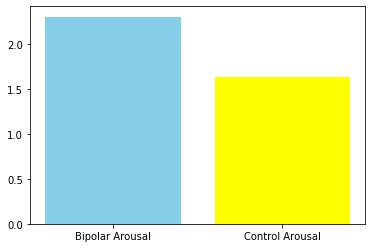

In [35]:
import numpy as np
import matplotlib.pyplot as plt
 
height = [2.3076814464458337, 1.6345723829574528]
bars = ('Bipolar Arousal', 'Control Arousal')
y_pos = np.arange(len(bars))
 
plt.bar(y_pos, height, color=['skyblue', 'yellow'])
plt.xticks(y_pos, bars)
plt.show()


In [13]:
df_bipolar['MeanValence'].mean()

0.2133666917574338

In [20]:
df_control['MeanValence'].mean()

0.23230854070665755

In [23]:
df_bipolar['PosVal'].mean()

1.3683190707782253

In [21]:
df_control['PosVal'].mean()

1.0041989043480273

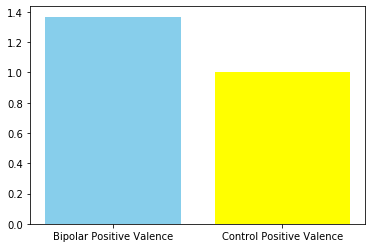

In [36]:
height = [1.3683190707782253, 1.0041989043480273]
bars = ('Bipolar Positive Valence', 'Control Positive Valence')
y_pos = np.arange(len(bars))
 
plt.bar(y_pos, height, color=['skyblue', 'yellow'])
plt.xticks(y_pos, bars)
plt.show()

In [24]:
df_bipolar['NegVal'].mean()

-0.3138192668779847

In [22]:
df_control['NegVal'].mean()

-0.17296477049013181

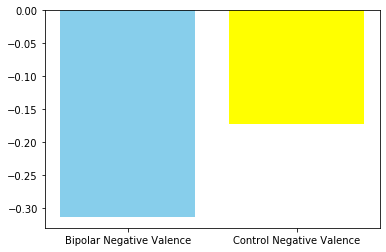

In [37]:
height = [-0.3138192668779847, -0.17296477049013181]
bars = ('Bipolar Negative Valence', 'Control Negative Valence')
y_pos = np.arange(len(bars))
 
plt.bar(y_pos, height, color=['skyblue', 'yellow'])
plt.xticks(y_pos, bars)
plt.show()